In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import re

def generate_urls(type: str, offset: int=None):
    assert type in ['manga', 'anime'], 'Please provide `type` of either `manga` or `anime`'
    _url = f'https://myanimelist.net/top{type}.php'

    if offset is not None:
        assert offset % 50 == 0, 'Please provide offset in multiples of 50'
        _url = _url + f'?limit={offset}'

    res = requests.get(_url)
    soup = BeautifulSoup(res.text, 'html.parser')

    if type == 'anime':
        titles = soup.find_all('h3', class_='anime_ranking_h3')
        dates = soup.find_all('div', class_='information di-ib mt4')
        scores = soup.find_all('div', class_='js-top-ranking-score-col di-ib al')
        ranks = soup.find_all('span', class_='rank')
        member_divs = soup.find_all('div', class_='information di-ib mt4')
    else:
        titles = soup.find_all('h3', class_='manga_h3')
        dates = soup.find_all('div', class_='information di-ib mt4')
        scores = soup.find_all('div', class_ ='js-top-ranking-score-col di-ib al' )
        ranks = soup.find_all('span', class_ = 'rank')
        member_divs = soup.find_all('div', class_='information di-ib mt4')

    results = []
    for title, date, score, rank, member_div in zip(titles, dates, scores, ranks, member_divs):
        _title = title.a.contents
        _url = title.a.get('href')
        date_text = date.contents[2].strip()
        # Extract the first and last year from the date range if present
        years = re.findall(r'\b\d{4}\b', date_text)
        if len(years) == 2:
            start_date = datetime.strptime(years[0], '%Y').date()
            end_date = datetime.strptime(years[1], '%Y').date()
            _date = f"{start_date.strftime('%Y-%m')} - {end_date.strftime('%Y-%m')}"
        elif len(years) == 1:
            _date = datetime.strptime(years[0], '%Y').date().strftime('%Y-%m')
        else:
            _date = None

        _score = float(score.text.strip()) if score else None

        _rank = int(rank.text.strip()) if rank else None

        _members = None
        if member_div:
            member_text = member_div.get_text(strip=True)
            member_count_match = re.search(r'(\d{1,3}(?:,\d{3})*)(?=\s+members)', member_text)
            if member_count_match:
                # Extract the digits and remove any commas
                _members = int(member_count_match.group(1).replace(',', ''))

        results.append({
            'title': _title,
            'url': _url,
            'date_published': _date,
            'score': _score,
            'rank': _rank,
            'members': _members
        })

    continuation_token = soup.find_all('a', class_='next')
    if continuation_token:
        if offset is None:
            offset = 50
        else:
            offset = offset + 50
    else:
        offset = None

    return offset, results
offset, results = generate_urls('anime', offset=None)
for result in results:
    print(result)


{'title': ['Sousou no Frieren'], 'url': 'https://myanimelist.net/anime/52991/Sousou_no_Frieren', 'date_published': '2023-01 - 2024-01', 'score': 9.38, 'rank': 1, 'members': 705018}
{'title': ['Fullmetal Alchemist: Brotherhood'], 'url': 'https://myanimelist.net/anime/5114/Fullmetal_Alchemist__Brotherhood', 'date_published': '2009-01 - 2010-01', 'score': 9.09, 'rank': 2, 'members': 103340016}
{'title': ['Steins;Gate'], 'url': 'https://myanimelist.net/anime/9253/Steins_Gate', 'date_published': '2011-01 - 2011-01', 'score': 9.07, 'rank': 3, 'members': 112559902}
{'title': ['Gintama°'], 'url': 'https://myanimelist.net/anime/28977/Gintama°', 'date_published': '2015-01 - 2016-01', 'score': 9.06, 'rank': 4, 'members': 629864}
{'title': ['Shingeki no Kyojin Season 3 Part 2'], 'url': 'https://myanimelist.net/anime/38524/Shingeki_no_Kyojin_Season_3_Part_2', 'date_published': '2019-01 - 2019-01', 'score': 9.05, 'rank': 5, 'members': 192271189}
{'title': ['Gintama: The Final'], 'url': 'https://myan

In [2]:
manga = []
offset = None
type = 'manga'
manga_count = 0

while manga_count < 200:  # Download only 100 manga
    offset, _res = generate_urls(type=type, offset=offset)
    manga += _res
    print(f'{offset} {type} downloaded')
    manga_count += len(_res)

50 manga downloaded
100 manga downloaded
150 manga downloaded
200 manga downloaded
250 manga downloaded
300 manga downloaded
350 manga downloaded
400 manga downloaded
450 manga downloaded
500 manga downloaded
550 manga downloaded
600 manga downloaded
650 manga downloaded
700 manga downloaded


In [3]:
manga[1]['url']

'https://myanimelist.net/manga/1706/JoJo_no_Kimyou_na_Bouken_Part_7__Steel_Ball_Run'

In [4]:
manga[0]['date_published']

'1989-01'

In [5]:
anime = []
offset = None
type = 'anime'
anime_count = 0

while anime_count < 200:
    offset, _res = generate_urls(type=type, offset=offset)
    anime += _res
    print(f'{offset} {type} downloaded')
    anime_count += len(_res)

50 anime downloaded
100 anime downloaded
150 anime downloaded
200 anime downloaded
250 anime downloaded
300 anime downloaded
350 anime downloaded
400 anime downloaded
450 anime downloaded
500 anime downloaded
550 anime downloaded
600 anime downloaded
650 anime downloaded
700 anime downloaded


In [6]:
anime[0]['url']

'https://myanimelist.net/anime/52991/Sousou_no_Frieren'

In [7]:
anime[0]['date_published']

'2023-01 - 2024-01'

In [8]:
manga[0].keys()

dict_keys(['title', 'url', 'date_published', 'score', 'rank', 'members'])

In [9]:
anime[0].keys()

dict_keys(['title', 'url', 'date_published', 'score', 'rank', 'members'])

In [10]:
import pandas as pd
pd.DataFrame(manga)

,title,url,date_published,score,rank,members
0,[Berserk],https://myanimelist.net/manga/2/Berserk,1989-01,9.47,1,691120
1,[JoJo no Kimyou na Bouken Part 7: Steel Ball Run],https://myanimelist.net/manga/1706/JoJo_no_Kim...,2004-01 - 2011-01,9.30,2,265875
2,[Vagabond],https://myanimelist.net/manga/656/Vagabond,1998-01 - 2015-01,9.25,3,382698
3,[One Piece],https://myanimelist.net/manga/13/One_Piece,1997-01,9.22,4,618508
4,[Monster],https://myanimelist.net/manga/1/Monster,1994-01 - 2001-01,9.16,5,245769
...,...,...,...,...,...,...
205,[Winter Woods],https://myanimelist.net/manga/113671/Winter_Woods,2014-01 - 2017-01,8.06,1,179044
206,[Suki na Ko ga Megane wo Wasureta],https://myanimelist.net/manga/117332/Suki_na_K...,2018-01,8.06,2,38461
207,[Houkago Shounen Hanako-kun],https://myanimelist.net/manga/121209/Houkago_S...,2018-01,8.06,3,7005
208,[Touhou Suichouka: Lotus Eater-tachi no Suisei],https://myanimelist.net/manga/123038/Touhou_Su...,2019-01,8.06,4,1951


In [11]:
pd.DataFrame(anime)

,title,url,date_published,score,rank,members
0,[Sousou no Frieren],https://myanimelist.net/anime/52991/Sousou_no_...,2023-01 - 2024-01,9.38,1,705018
1,[Fullmetal Alchemist: Brotherhood],https://myanimelist.net/anime/5114/Fullmetal_A...,2009-01 - 2010-01,9.09,2,103340016
2,[Steins;Gate],https://myanimelist.net/anime/9253/Steins_Gate,2011-01 - 2011-01,9.07,3,112559902
3,[Gintama°],https://myanimelist.net/anime/28977/Gintama°,2015-01 - 2016-01,9.06,4,629864
4,[Shingeki no Kyojin Season 3 Part 2],https://myanimelist.net/anime/38524/Shingeki_n...,2019-01 - 2019-01,9.05,5,192271189
...,...,...,...,...,...,...
205,[Durarara!!x2 Shou],https://myanimelist.net/anime/23199/Durararax2...,2015-01 - 2015-01,7.98,1,484225
206,[Haibane Renmei],https://myanimelist.net/anime/387/Haibane_Renmei,2002-01 - 2002-01,7.98,2,287818
207,[xxxHOLiC],https://myanimelist.net/anime/861/xxxHOLiC,2006-01 - 2006-01,7.98,3,321743
208,[Sword Art Online: Progressive Movie - Hoshi N...,https://myanimelist.net/anime/42916/Sword_Art_...,2021-01 - 2021-01,7.97,4,253255


In [12]:
anime_df = pd.DataFrame(anime)
manga_df = pd.DataFrame(manga)

In [13]:
manga_df

,title,url,date_published,score,rank,members
0,[Berserk],https://myanimelist.net/manga/2/Berserk,1989-01,9.47,1,691120
1,[JoJo no Kimyou na Bouken Part 7: Steel Ball Run],https://myanimelist.net/manga/1706/JoJo_no_Kim...,2004-01 - 2011-01,9.30,2,265875
2,[Vagabond],https://myanimelist.net/manga/656/Vagabond,1998-01 - 2015-01,9.25,3,382698
3,[One Piece],https://myanimelist.net/manga/13/One_Piece,1997-01,9.22,4,618508
4,[Monster],https://myanimelist.net/manga/1/Monster,1994-01 - 2001-01,9.16,5,245769
...,...,...,...,...,...,...
205,[Winter Woods],https://myanimelist.net/manga/113671/Winter_Woods,2014-01 - 2017-01,8.06,1,179044
206,[Suki na Ko ga Megane wo Wasureta],https://myanimelist.net/manga/117332/Suki_na_K...,2018-01,8.06,2,38461
207,[Houkago Shounen Hanako-kun],https://myanimelist.net/manga/121209/Houkago_S...,2018-01,8.06,3,7005
208,[Touhou Suichouka: Lotus Eater-tachi no Suisei],https://myanimelist.net/manga/123038/Touhou_Su...,2019-01,8.06,4,1951


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = anime_df[['score', 'members']].copy()
X['members_manga'] = manga_df['members']
y = anime_df['rank']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.3838095238095238


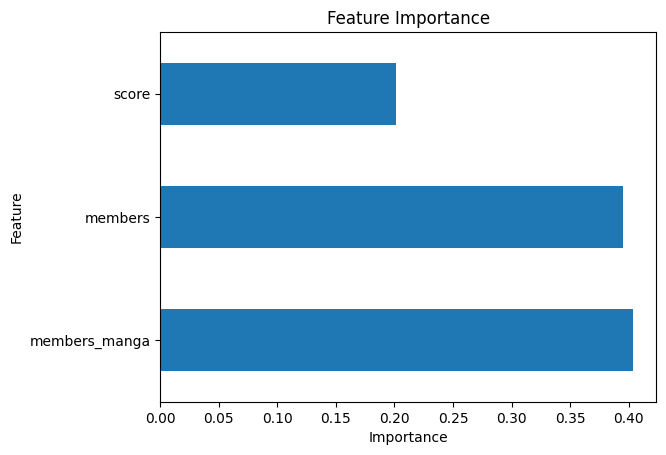

In [29]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


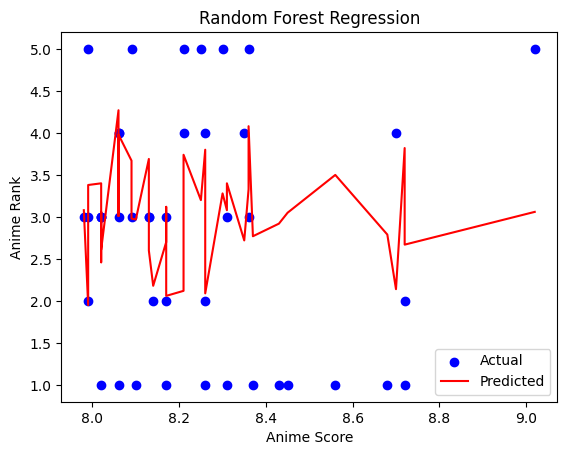

In [35]:
plt.scatter(X_test['score'], y_test, color='blue', label='Actual')
X_test_sorted = X_test.sort_values(by='score')
y_pred_sorted = rf_model.predict(X_test_sorted)
plt.plot(X_test_sorted['score'], y_pred_sorted, color='red', label='Predicted')
plt.xlabel('Anime Score')
plt.ylabel('Anime Rank')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

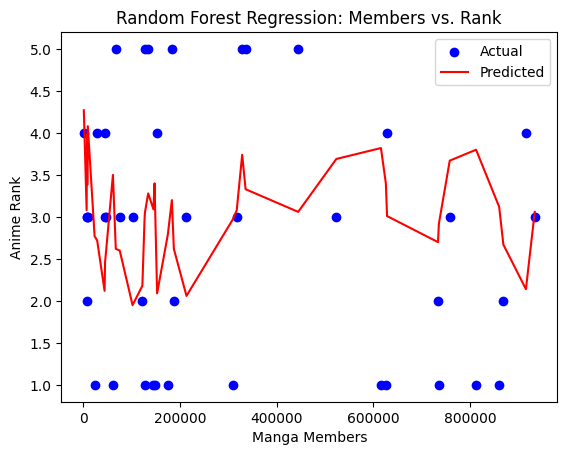

In [34]:

plt.scatter(X_test['members_manga'], y_test, color='blue', label='Actual')
X_test_sorted = X_test.sort_values(by='members_manga')

y_pred_sorted = rf_model.predict(X_test_sorted)
plt.plot(X_test_sorted['members_manga'], y_pred_sorted, color='red', label='Predicted')

plt.xlabel('Manga Members')
plt.ylabel('Anime Rank')
plt.title('Random Forest Regression: Members vs. Rank')
plt.legend()
plt.show()
